In [1872]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA


In [1873]:
normalization=True

In [1646]:
feature_names= []
feature_types = [ "boroujeni_et_al", "chen_cui", "marras_et_al", "lalle_conati"]

for feature_type in feature_types:
    filepath = '../ex-epfl-mooc/scripts/feature_names/' + feature_type + '.csv'
    feature_type_name = pd.read_csv(filepath,header=None)
    feature_type_name = feature_type_name.values.reshape(-1)
    feature_names.append(feature_type_name)
    print(feature_type_name.shape)
    
feature_names = np.concatenate(feature_names)
feature_names

(3,)
(13,)
(7,)
(22,)


array(['RegPeakTimeDayHour', 'RegPeriodicityM1', 'DelayLecture',
       'TotalClicks', 'NumberOfSessions', 'TotalTimeSessions',
       'AvgTimeSessions', 'StdTimeBetweenSessions', 'StdTimeSessions',
       'TotalClicksWeekday', 'TotalClicksWeekend',
       'RatioClicksWeekendDay', 'TotalClicksVideoChen',
       'TotalClicksProblem', 'TotalTimeProblem', 'TotalTimeVideo',
       'CompetencyStrength', 'CompetencyAlignment',
       'CompetencyAnticipation', 'ContentAlignment',
       'ContentAnticipation', 'StudentSpeed', 'StudentShape',
       'TotalClicksVideoLoad', 'AvgWatchedWeeklyProp',
       'StdWatchedWeeklyProp', 'AvgReplayedWeeklyProp',
       'StdReplayedWeeklyProp', 'AvgInterruptedWeeklyProp',
       'StdInterruptedWeeklyProp', 'TotalClicksVideoConati',
       'FrequencyEventVideo', 'FrequencyEventLoad',
       'FrequencyEventVideoPlay', 'FrequencyEventVideoPause',
       'FrequencyEventVideoStop', 'FrequencyEventVideoSeekBackward',
       'FrequencyEventVideoSeekForward', 'Fre

In [1512]:
# create normalized LIME results
folder = "../ex-epfl-mooc/uniform_eq_results"
courses = ['dsp_001', 'dsp_002', 'geomatique_003', 'villesafricaines_001', 'microcontroleurs_003']
lime_normalized = []
for course in courses:
    extract_file = folder + "/LIME/" + course + "/dataframes/all_important_features.csv"
    df = pd.read_csv(extract_file, header=0)
    df.drop(['exp number', 'real value'], axis = 1, inplace = True) 
    if normalization:
        normalized_df=(df-df.min())/(df.max()-df.min())
        normalized_df = normalized_df.div(normalized_df.sum(axis=1), axis=0)
    else:
        normalized_df = df
    df = pd.read_csv(extract_file, header=0)
    normalized_df['exp number'] = df['exp number']
    normalized_df['real value'] = df['real value']
    normalized_df.to_csv('normalized_LIME_' + course +".csv")
    lime_normalized.append((course,normalized_df))

In [1513]:
# normalized Permutation SHAP results
folder = "../ex-epfl-mooc/uniform_eq_results"
courses = ['dsp_001', 'dsp_002', 'geomatique_003', 'villesafricaines_001', 'microcontroleurs_003']
perm_shap_normalized = []
for course in courses:
    extract_file = folder + "/SHAP/Permutation/" + course + ".csv"
    df = pd.read_csv(extract_file, header=0)
    df.drop(['Unnamed: 0', 'exp_num'], axis = 1, inplace = True) 
    if normalization:
        normalized_df=(df-df.min())/(df.max()-df.min())
        normalized_df = normalized_df.div(normalized_df.sum(axis=1), axis=0)
    else:
        normalized_df = df
    df = pd.read_csv(extract_file, header=0)
    normalized_df['exp number'] = df['exp_num']
    normalized_df.to_csv('normalized_SHAP_' + course +".csv")
    perm_shap_normalized.append((course,normalized_df))
# #     df.drop(['exp number', 'real value'], axis = 1, inplace = True) 
#     normalized_df=(df-df.min())/(df.max()-df.min())
#     normalized_df.to_csv('normalized_SHAP_' + course +".csv")

In [1514]:
# counterfactuals
folder = "../ex-epfl-mooc/uniform_eq_results"
courses = ['dsp_001', 'dsp_002', 'geomatique_003', 'villesafricaines_001', 'microcontroleurs_003']
counter_normalized = []
for course in courses:
    shap_df = pd.read_csv('normalized_SHAP_' + course +".csv", header=0)
    cf_list = []
    for i in shap_df['exp number']:
        extract_file = folder + "/Counterfactuals/" + course + "/feature_importances_" + str(i) + ".csv"
        try:
            instance = pd.read_csv(extract_file)
            cf_list.append(instance)
        except:
            cf_list.append(pd.DataFrame())
    if len(cf_list) > 1:
        df = pd.concat(cf_list, axis=0)
        if normalization:
            normalized_df=(df-df.min())/(df.max()-df.min())
            normalized_df = normalized_df.div(normalized_df.sum(axis=1), axis=0)
        else:
            normalized_df = df
        normalized_df['exp number'] = shap_df['exp number']
        normalized_df.to_csv('normalized_Counterfactuals_' + course +".csv")
        counter_normalized.append((course, normalized_df))

In [1515]:
# CEM
folder = "../ex-epfl-mooc/uniform_eq_results"
courses = ['dsp_001', 'dsp_002', 'geomatique_003', 'villesafricaines_001', 'microcontroleurs_003']
cem_normalized = []
for course in courses:
    extract_file = folder + "/CEM/" + course + "/importances.csv"
    df = pd.read_csv(extract_file, header=0)
    df.drop(['Unnamed: 0', 'exp_num'], axis = 1, inplace = True) 
    if normalization:
        normalized_df=(df-df.min())/(df.max()-df.min())
        normalized_df = normalized_df.div(normalized_df.sum(axis=1), axis=0)
    else:
        normalized_df = df
    df = pd.read_csv(extract_file, header=0)
    normalized_df['exp number'] = df['exp_num']
    normalized_df.to_csv('normalized_CEM_' + course +".csv")
    cem_normalized.append((course,normalized_df))

In [1516]:
# normalized Kernel SHAP results
folder = "../ex-epfl-mooc/uniform_eq_results"
courses = ['dsp_001', 'dsp_002', 'geomatique_003', 'villesafricaines_001', 'microcontroleurs_003']
kernel_shap_normalized = []
for course in courses:
    extract_file = folder + "/SHAP/Kernel/" + course + ".csv"
    try:
         df = pd.read_csv(extract_file, header=0)
    except:
        kernel_shap_normalized.append((course, pd.DataFrame()))
        continue
    df.drop(['Unnamed: 0', 'exp_num'], axis = 1, inplace = True) 
    if normalization:
        normalized_df=(df-df.min())/(df.max()-df.min())
        normalized_df = normalized_df.div(normalized_df.sum(axis=1), axis=0)
    else:
        normalized_df = df
    df = pd.read_csv(extract_file, header=0)
    normalized_df['exp number'] = df['exp_num']
    normalized_df.to_csv('normalized_SHAP_' + course +".csv")
    kernel_shap_normalized.append((course,normalized_df))
# #     df.drop(['exp number', 'real value'], axis = 1, inplace = True) 
#     normalized_df=(df-df.min())/(df.max()-df.min())
#     normalized_df.to_csv('normalized_SHAP_' + course +".csv")

In [1796]:
course_names = ['dsp_001', 'dsp_002', 'geomatique_003', 'villesafricaines_003', 'microcontroleurs_003']

In [1801]:
cem_vals, perm_shap_vals, lime_vals, dice_vals, kernel_shap_vals = [], [], [], [], []

def fit_pca(pca, df):
    if len(df) < 1:
        return []
    pca.fit(df.select_dtypes(['number']).select_dtypes(['number']).fillna(0))
    return pca.singular_values_

pca = PCA(n_components=2)
# for i,course in enumerate(courses):
#     cem_vals.append(fit_pca(pca, cem_normalized[i][1]))
#     kernel_shap_vals.append(fit_pca(pca, kernel_shap_normalized[i][1]))
#     perm_shap_vals.append(fit_pca(pca, perm_shap_normalized[i][1]))
#     lime_vals.append(fit_pca(pca, lime_normalized[i][1]))
#     dice_vals.append(fit_pca(pca, counter_normalized[i][1]))

for i,course in enumerate(courses):
    cem_vals.append(fit_pca(pca, all_points[(course, 'CEM')]))
    kernel_shap_vals.append(fit_pca(pca, all_points[(course, 'KernelSHAP')]))
    perm_shap_vals.append(fit_pca(pca, all_points[(course, 'PermSHAP')]))
    lime_vals.append(fit_pca(pca, all_points[(course, 'LIME')]))
    dice_vals.append(fit_pca(pca, all_points[(course, 'DiCE')]))


In [1802]:
vals = [cem_vals, kernel_shap_vals, perm_shap_vals, lime_vals, dice_vals]
total_list = []
[total_list.extend(l) for l in vals]

[None, None, None, None, None]

In [1803]:
dice_vals

[array([0.532216  , 0.43298395]),
 array([0.55710649, 0.54116234]),
 array([0.48911771, 0.39203003]),
 array([0.40467073, 0.36452424]),
 array([0.70639015, 0.54676374])]

In [1804]:
vals = pd.DataFrame(total_list, columns=['pca1', 'pca2'])

In [1805]:
vals

,pca1,pca2
0,1.294523,0.673504
1,1.250750,0.473393
2,1.140360,0.476580
3,1.299641,0.744204
4,1.121293,0.744473
5,0.487605,0.055335
6,0.322372,0.039901
7,0.272741,0.029772
8,0.326509,0.034595
9,0.581428,0.079357


In [1806]:
total_names = []
pca_dim = 5
# vals = [cem_vals, kernel_shap_vals, perm_shap_vals, lime_vals, dice_vals]
courses = ['dsp_001', 'dsp_002', 'geomatique_003', 'villesafricaines_001', 'microcontroleurs_003']
names = [['cem'] * pca_dim + ['kernel_shap']*pca_dim, ['perm_shap'] * pca_dim, ['lime'] * pca_dim, ['dice'] * pca_dim]
[total_names.extend(l) for l in names]
vals['method'] = total_names
vals['course'] = courses * 5
vals['method_pretty'] = np.concatenate([['CEM'] * pca_dim + ['KernelSHAP']*pca_dim, ['PermSHAP'] * pca_dim, ['LIME'] * pca_dim, ['DiCE'] * pca_dim])

In [1807]:
df.columns

Index([0, 'week', 'feature_name'], dtype='object')

In [1393]:
all_cols.append(['AvgReplayedWeeklyProp',
 'AvgTimeSessions',
 'CompetencyAlignment',
 'CompetencyAnticipation',
 'CompetencyStrength',
 'ContentAlignment',
 'ContentAnticipation',
 'DelayLecture',
 'RatioClicksWeekendDay',
 'RegPeakTimeDayHour',
 'RegPeriodicityM1',
 'StdTimeSessions',
 'StudentShape',
 'StudentSpeed',
 'TotalTimeProblem',
 'TotalTimeVideo'])

In [1399]:
all_cols = set(np.concatenate(all_cols))

In [1857]:
d.columns.values

array(['RegPeriodicityM1', 'RegPeakTimeDayHour', 'DelayLecture',
       'FrequencyEventLoad', 'TotalClicksProblem',
       'AvgReplayedWeeklyProp', 'CompetencyAnticipation',
       'NumberOfSessions', 'TotalTimeProblem'], dtype=object)

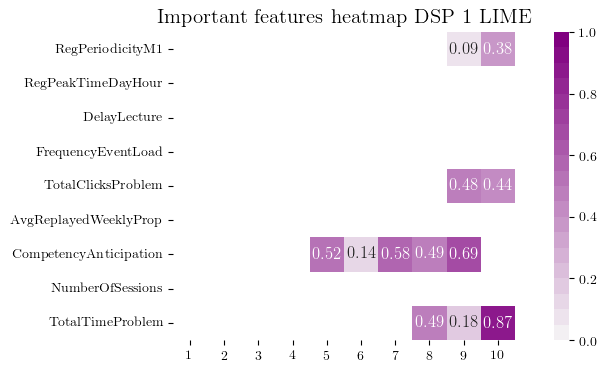

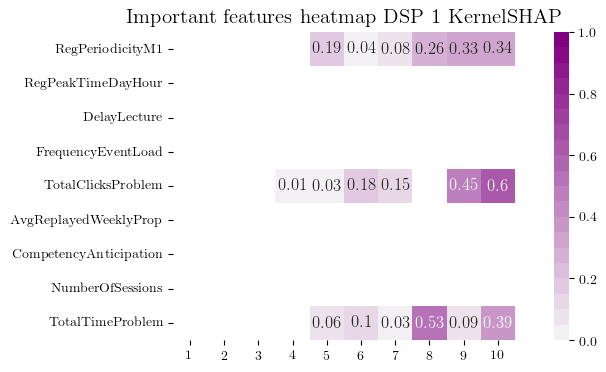

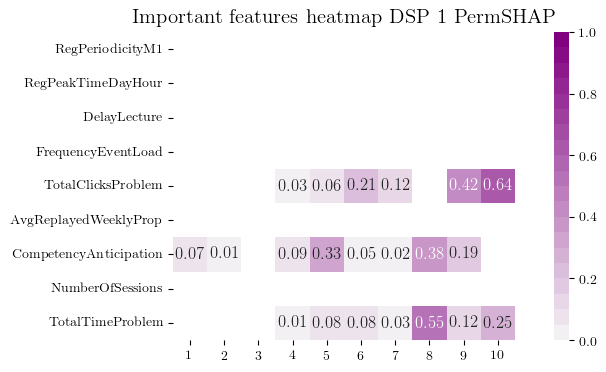

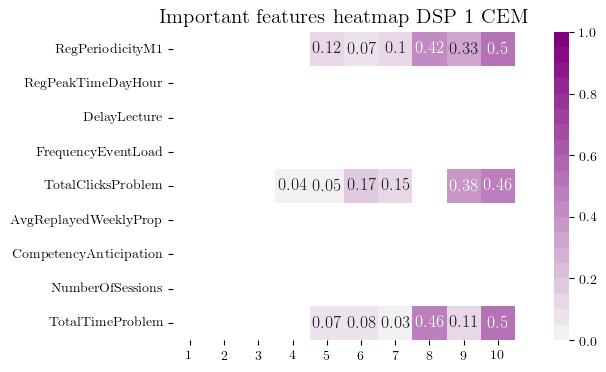

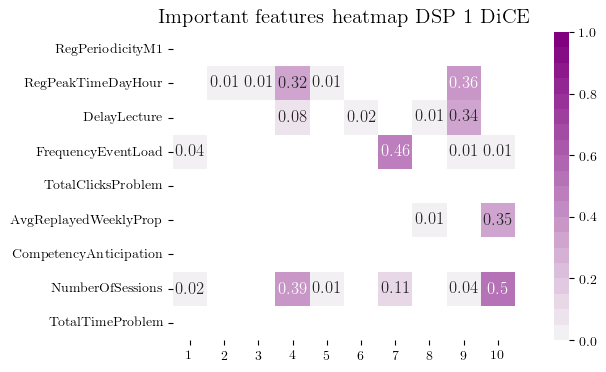

In [1858]:
#For LIME df is explanations for each instance stacked together features not present in one instance have nan as their value
course_index = 0
num_weeks = 10
course = course_names[course_index]
exp_sets = [
    ('LIME', lime_normalized),
    ('KernelSHAP', kernel_shap_normalized),
    ('PermSHAP', perm_shap_normalized),
    ('CEM', cem_normalized),
    ('DiCE', counter_normalized)
]
for method, overall_df in exp_sets:
    df = overall_df[course_index][1]
    if 'exp number' in df.columns:
        df = df.drop(['exp number'], axis=1)
             
    if 'exp_num' in df.columns:
        df = df.drop(['exp_num'], axis=1)
             
    if 'real value' in df.columns:
        df = df.drop(['real value'], axis=1)
    
    df = abs(df)
    if "LIME" not in method:
        sorted_values = np.argsort(abs(df), axis = 1) #.drop('exp_num', axis=1)
    #     df = df.drop('exp_num', axis=1)
    #     print(sorted_values.shape, df.shape)
    #     df = sorted_values.iloc[:, df.shape[1]-10:]
        ind = sorted_shap_values.iloc[:,:df.shape[1]-10]
    #     print(ind)
    #     print(df.shape[0])
        for i in np.arange(df.shape[0]):
            df.iloc[i,ind.iloc[i,:]]=np.nan #features outside top ten is replaced with nans
        df = df.iloc[:,~((df.isnull().sum(axis=0)==df.shape[0]).values)]#eliminating features with all nans

    ai = np.argsort(df.values) #nans will come after numbers
    for j,c in enumerate(list(ai[:,:10])): # changing feature importance to scores
        df.iloc[j,c] = np.arange(1,11)
    top_features = df.columns
    top_features_type = np.array([s[0:s.find('_InWeek')].split(' ')[-1] for s in top_features])
    top_features_week = np.array([s[s.find('_InWeek')+7::].split(' ')[0] for s in top_features])
    count = np.nansum(df.values,axis=0)#summing without the nans-----total score
    top_features_type_unique = list({ k for k in top_features_type })
    top_features_week_unique = list({ k for k in top_features_week })
    ######
    zero_data = np.zeros(shape=(num_weeks,len(top_features_type_unique)))
    d = pd.DataFrame(zero_data, columns=top_features_type_unique)
    for i,f in enumerate(top_features_type):
        d[f][int(top_features_week[i])-1]+=count[i]
    d = d/(df.shape[0]*10)
    d = d.iloc[:,((d>=0.333333).sum(axis=0)>0).values]#cutting criteria

    col_rename = {}
    for col in df.columns:
        col_rename[col.split('_InWeek')[0]] = mapping(col.split('_InWeek')[0])
    d = d.rename(columns=col_rename)
    
    for col in all_cols:
        if col not in d.columns:
            new_col = np.empty((len(d),1))
            new_col.fill(0)
            d.insert(0, col, new_col)
    
    d = d[all_cols]
    ######
    fig, ax = plt.subplots(figsize=(10, 4),facecolor='white')
    cmap = sns.light_palette("purple",n_colors=20)
    d[d.values<0.01]=np.nan
    annot = np.vectorize(lambda x: '' if x<0.01 else str(round(x,2)))(d.T.to_numpy())
    heatmap_font = 12
    g = sns.heatmap(d.values.T, annot=annot, fmt="", vmin=0, vmax=1, annot_kws={"fontsize":heatmap_font, "weight":'bold'},cmap=cmap, square=True)
    g.set_xticklabels(np.arange(1,num_weeks+1),rotation=0)
    g.set_yticklabels(d.columns.values,rotation=0)
#     border = 0.5
#     g.axhline(y = 0, color='k',linewidth = border)
#     g.axhline(y = d.shape[1], color = 'k',
#                     linewidth = border)
#     g.axvline(x = 0, color = 'k',
#                     linewidth = border)
#     g.axvline(x = d.shape[0], 
#                     color = 'k', linewidth = border)
    g.set_title( 'Important features heatmap '+ course + " " +  method, fontsize=15)
    plt.savefig('plots/important_features_' + course + "_" + method + ".svg",  bbox_inches = 'tight', facecolor=fig.get_facecolor())
    # pyplot.savefig(“./LIME_results/” + group + r”/pyplots/heatmap.png”, bbox_inches = ‘tight’, facecolor=fig.get_facecolor())

In [1854]:
d.columns

Index(['RegPeriodicityM1', 'RegPeakTimeDayHour', 'DelayLecture',
       'FrequencyEventLoad', 'TotalClicksProblem', 'AvgReplayedWeeklyProp',
       'CompetencyAnticipation', 'NumberOfSessions', 'TotalTimeProblem'],
      dtype='object')

In [1525]:
vals_df

,pca1,pca2,method,course,method_pretty
4,0.906552,0.489862,cem,microcontroleurs_003,CEM
9,0.082028,0.054423,kernel_shap,microcontroleurs_003,KernelSHAP
14,0.099936,0.066087,perm_shap,microcontroleurs_003,PermSHAP
19,1.408931,0.937504,lime,microcontroleurs_003,LIME
24,0.408863,0.241725,dice,microcontroleurs_003,DiCE


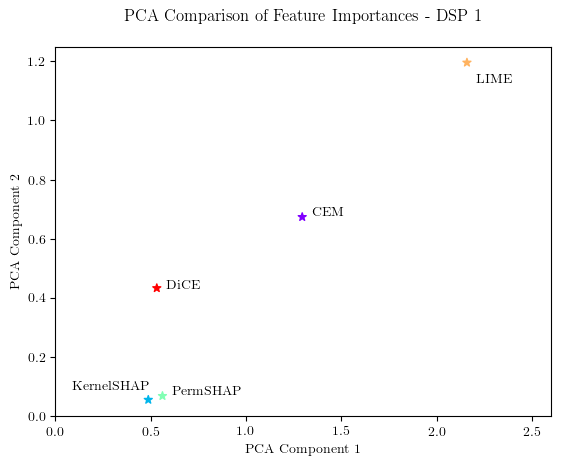

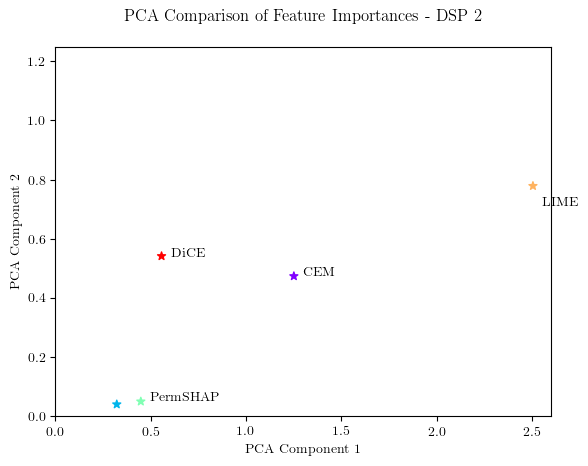

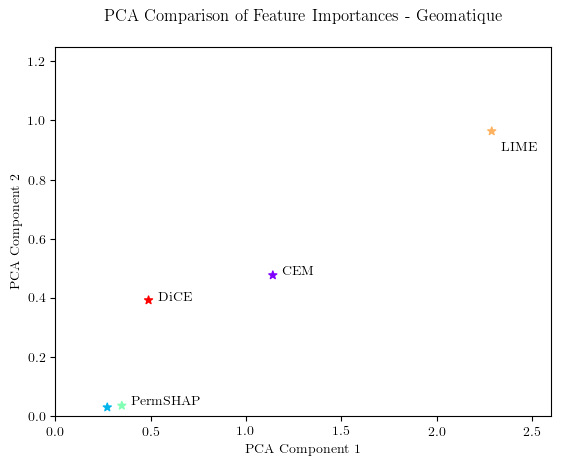

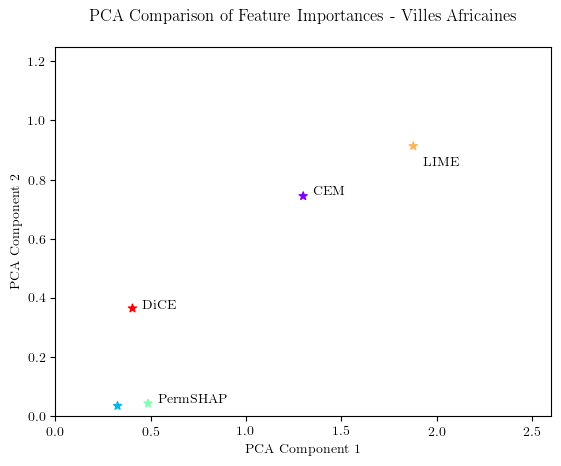

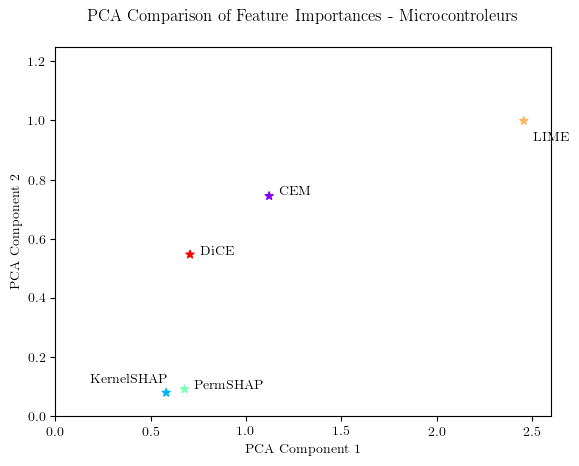

In [1860]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from matplotlib import rc
import matplotlib
matplotlib.rc_file_defaults()

rc('font', **{'family': 'serif', 'serif': ['Computer Modern Bold']})
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{amssymb}')

matplotlib.rcParams['text.usetex'] = True
course_names = ['DSP 1', 'DSP 2', 'Geomatique', 'Villes Africaines', 'Microcontroleurs']

for course_index in np.arange(5):
    course = courses[course_index]
#     n = ['   CEM', '  DICE', '   KernelSHAP', '   LIME', '  PermSHAP']
    vals_df =vals[vals['course'] == course]
    x = vals_df['pca1']
    y = vals_df['pca2']
    t = np.arange(5)
    plt.figure()
    plt.scatter(x, y, c=t, cmap="rainbow", marker='*')
    for i, txt in enumerate(vals_df['method_pretty']):
        if 'Kernel' in txt:
            plt.annotate(txt, (x[i*5+course_index]-0.4, y[i*5+course_index]+0.03))
        else: 
            if 'LIME' in txt:
                plt.annotate(txt, (x[i*5+course_index]+0.05, y[i*5+course_index] - 0.07))
            else:
                plt.annotate(txt, (x[i*5+course_index]+0.05, y[i*5+course_index]))
    plt.title('PCA Comparison of Feature Importances - '+ course_names[course_index] + '\n') 
    plt.xlim(0, 2.6)
    plt.ylim(0, 1.25)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.savefig("plots/" + course + "_PCA_analysis.svg")

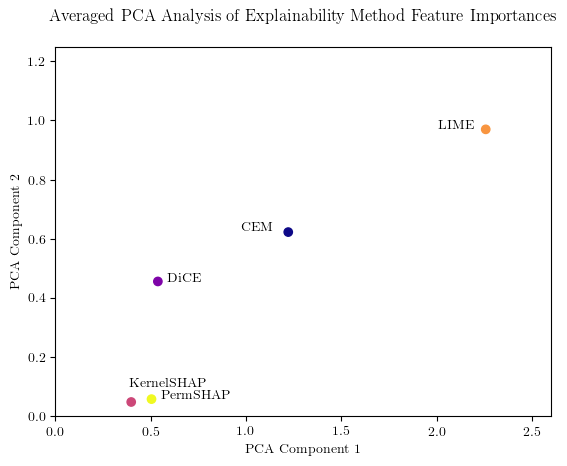

In [1816]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

course = courses[course_index]
vals_df =vals.groupby('method_pretty').mean()
x=vals_df['pca1']
y=vals_df['pca2']
t=np.arange(5)
plt.scatter(x, y, c=t, cmap=cm.plasma)
for i, txt in enumerate(vals_df.index):
    if x[i] > 1.2:
            plt.annotate(txt, (x[i]-0.25, y[i]))
    else:
        if 'Kernel' in txt:
            plt.annotate(txt, (x[i]-0.01, y[i]+0.05))
        else: 
            plt.annotate(txt, (x[i]+0.05, y[i]))
plt.xlim(0, 2.6)
plt.ylim(0, 1.25)
plt.title('Averaged PCA Analysis of Explainability Method Feature Importances \n')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.savefig('plots/averaged_pca_analysis.png')

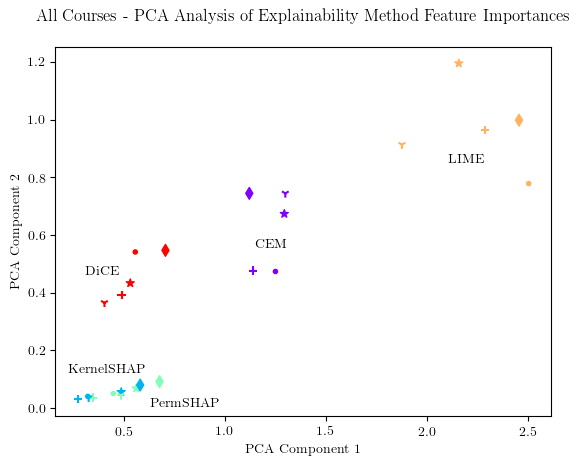

In [1861]:
# vals = pd.DataFrame(pca_vals, columns=['pca1', 'pca2'])
vals_methods = vals # [vals['method'].isin(['perm_shap', 'lime']) ]
markers = ['*', '.', '+', '1', 'd']
for j,course in enumerate(courses):
    subset = vals_methods[vals_methods['course'] == course]
    x=np.array(subset['pca1'])
    y=np.array(subset['pca2'])
    t=np.arange(5)
    plt.scatter(x, y, c=t, cmap='rainbow', marker=markers[j])
    n = ['d1', 'd2', 'geo', 'va', 'm']
    for i, txt in enumerate(vals_methods['method_pretty']):
        if j==1 and i%5 == 0:
            if 'LIME' in txt:
                plt.annotate(txt, (x[3]-0.4, y[3]+0.07))
            else:
                if 'CEM' in txt:
                    plt.annotate(txt, (x[0]-0.1, y[0]+0.08))
                else:
                    if 'DiCE' in txt:
                        plt.annotate(txt, (x[4]-0.25, y[4]-0.08))
                    if 'Kernel' in txt:
                        plt.annotate(txt, (x[1]-0.1, y[1]+0.08))
                    if 'Perm' in txt:
                        plt.annotate(txt, (x[2]+0.18, y[2]-0.05))
    plt.title('All Courses - PCA Analysis of Explainability Method Feature Importances\n')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.savefig('plots/all_courses_pca.svg')
    # ax.legend([0, 1, 2, 3, 4],['cem', 'kernel_shap', 'perm_shap', 'lime', 'dice'], loc='lower right')

### Quantitative Metrics: Frobenius Norm + Cosine Distance

In [780]:
np.array(exp_sets).shape

/tmp/ipykernel_3063577/1529393401.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(exp_sets).shape


(5, 2)

In [1530]:
# experiment_set = counter_normalized
# method = 'DICE'
# for i in range(len(courses)):
df = experiment_set[0][1]
for method, experiment_set in exp_sets:
    print(method)
    if len(df) > 1:
        plt.figure()
        if method == 'DICE':
            df = df.drop('exp number',axis=1).mean() #.drop('exp_num',axis=1).drop('Unnamed: 0',axis=1)
        else:
            df = df.drop('exp number',axis=1).mean()
        df = pd.DataFrame(df)
        print(df.index)
        df['week'] = [int(i.split('_InWeek')[-1]) for i in df.index]
        df['feature_name'] = [i.split('_InWeek')[0] for i in df.index]
        heatmap_df = df.pivot( "feature_name","week", 0)
        ax = sns.heatmap(heatmap_df)
        ax.set_title(courses[0] + "- " + method)
        plt.savefig("Heatmaps/" + "horizontal_" + courses[0] + "- " + method + ".png", bbox_inches='tight')

LIME
Index(['TotalTimeProblem_InWeek10 > 0.00', 'RegPeriodicityM1_InWeek10 > 1.00',
       'TotalClicksProblem_InWeek9 <= 0.00',
       'CompetencyAnticipation_InWeek9 <= 0.00',
       'TotalTimeProblem_InWeek8 <= 0.00',
       'CompetencyAnticipation_InWeek5 <= 0.00',
       'CompetencyAnticipation_InWeek7 <= 0.00',
       'CompetencyAnticipation_InWeek8 <= 0.00',
       'TotalTimeProblem_InWeek9 <= 0.00',
       'ContentAnticipation_InWeek5 <= 0.00',
       'TotalTimeProblem_InWeek10 <= 0.00',
       'RegPeriodicityM1_InWeek10 <= 0.00',
       'TotalClicksProblem_InWeek10 <= 0.00',
       'RegPeriodicityM1_InWeek9 <= 0.00',
       'CompetencyAnticipation_InWeek6 <= 0.00',
       'RegPeriodicityM1_InWeek9 > 1.00', 'TotalClicksProblem_InWeek7 <= 0.00',
       'AvgReplayedWeeklyProp_InWeek7 <= 0.00',
       'TotalClicksProblem_InWeek9 > 0.00', 'StudentSpeed_InWeek10 <= 24.00',
       'CompetencyAnticipation_InWeek5 > 0.00',
       'CompetencyAnticipation_InWeek9 > 0.00',
       'Compete

/tmp/ipykernel_3063577/2406399046.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.drop('exp number',axis=1).mean()


ValueError: invalid literal for int() with base 10: '10 > 0.00'

<Figure size 432x288 with 0 Axes>

In [1531]:
exp_sets = [
    ('LIME', lime_normalized),
    ('KernelSHAP', kernel_shap_normalized),
    ('PermSHAP', perm_shap_normalized),
    ('CEM', cem_normalized),
    ('DiCE', counter_normalized)
]

In [1864]:
top_5 = [f[:5].index.values for f in feature_sums]
top_5 = [item for sublist in top_5 for item in sublist]
set(top_5)

{'AvgReplayedWeeklyProp',
 'AvgWatchedWeeklyProp',
 'CompetencyAnticipation',
 'ContentAlignment',
 'FrequencyEventLoad',
 'RatioClicksWeekendDay',
 'RegPeriodicityM1',
 'StdTimeBetweenSessions',
 'StdTimeSessions',
 'StudentSpeed',
 'TotalClicksProblem',
 'TotalClicksWeekend',
 'TotalTimeProblem'}

LIME
KernelSHAP
PermSHAP
CEM
DiCE


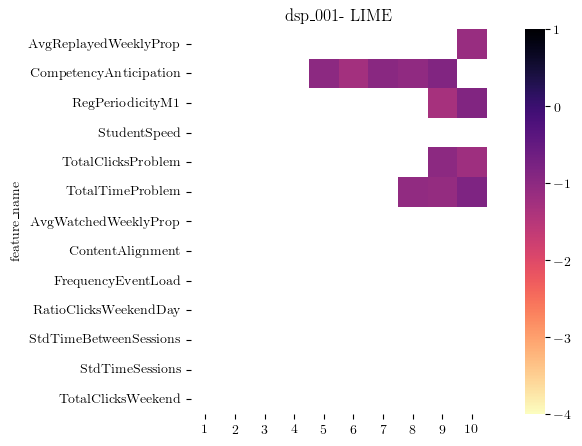

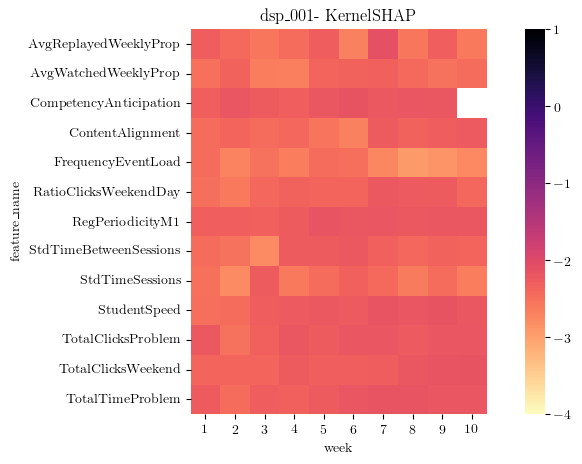

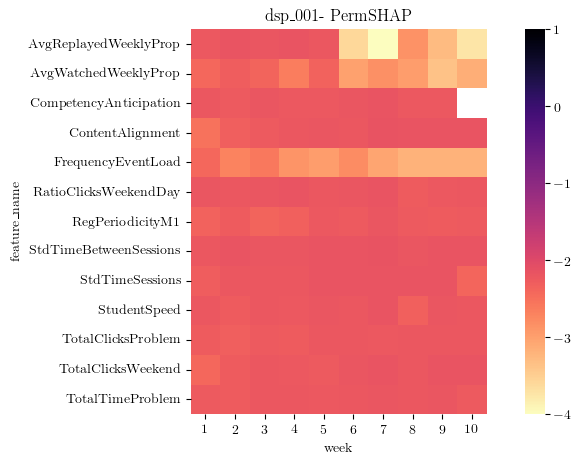

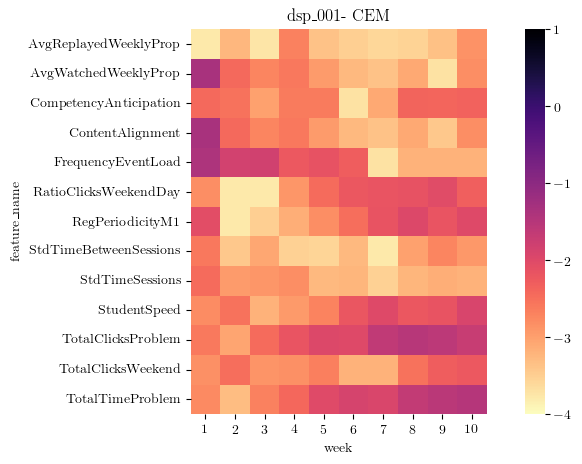

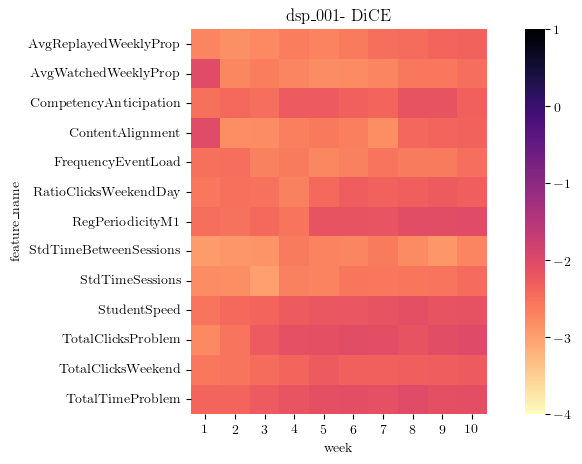

In [1881]:
from matplotlib.colors import LogNorm

exp_sets = [
    ('LIME', lime_normalized),
    ('KernelSHAP', kernel_shap_normalized),
    ('PermSHAP', perm_shap_normalized),
    ('CEM', cem_normalized),
    ('DiCE', counter_normalized)
]
feature_sums = []
for method, experiment_set in exp_sets:
    print(method)
    fig, ax = plt.subplots(figsize=(10, 5),facecolor='white')
#     for i in range(len(courses)):
    i = 0
    df = experiment_set[i][1]
    if len(df) > 1:
        if method == 'DiCE':
            df = df.drop('exp number',axis=1).drop('exp_num',axis=1).drop('Unnamed: 0',axis=1).mean()
        else:
            if method == 'LIME':
                df = df.drop('real value',axis=1)
            df = df.drop('exp number',axis=1).mean() #.drop('exp_num',axis=1).drop('Unnamed: 0',axis=1)

        df = pd.DataFrame(df)
        df.index = [max(i.split(' '), key=len) for i in df.index]
        df = df[~df.index.duplicated()]
        if method == 'LIME':
            df['week'] = [int(i.split('_InWeek')[1].split(' ')[0]) for i in df.index]
            df['feature_name'] = [i.split('_InWeek')[0] for i in df.index]
        else:
            df['week'] = [int(i.split('_InWeek')[1]) for i in df.index]
            df['feature_name'] = [i.split('_InWeek')[0].split(' ')[-1] for i in df.index]
            if method == 'CEM' or method == 'DiCE':
                df['feature_name'] = [mapping(i.split('_InWeek')[0].split(' ')[-1]) for i in df.index]
        heatmap_df = df.pivot("feature_name","week", 0)
#         print(heatmap_df)
        if method == 'LIME':
            for j in np.arange(10, 0, -1):
                if j not in heatmap_df.columns:
                    new_col = np.empty((len(heatmap_df),1))
                    new_col.fill(0)
                    heatmap_df.insert(0, j, new_col)
            for col in index:
                if col not in heatmap_df.index:
                    row_nan = np.empty((10))
                    row_nan.fill(0)
                    new_row = pd.Series(data=row_nan, name=col)
                    heatmap_df = heatmap_df.append(new_row, ignore_index=False)
            heatmap_df = heatmap_df.drop(0, axis=1)
        heatmap_df = heatmap_df.fillna(0)
        numeric_df = heatmap_df.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)
#         feature_sums.append(heatmap_df.sum(axis=1).sort_values(ascending=False))
        numeric_df = numeric_df[numeric_df.index.isin(set(top_5))]
# #         print(heatmap_df)
        ax = sns.heatmap(numeric_df, vmax=1, vmin=-4, cmap='magma_r', square=True)
#         ax = sns.heatmap(heatmap_df, robust=True)
        ax.set_title(courses[i] + "- " + method)
        plt.savefig("Heatmaps/" + "expanded_" + courses[i] + "- " + method + ".svg", bbox_inches='tight')

In [1539]:
lime_normalized[0][1]

,TotalTimeProblem_InWeek10 > 0.00,RegPeriodicityM1_InWeek10 > 1.00,TotalClicksProblem_InWeek9 <= 0.00,CompetencyAnticipation_InWeek9 <= 0.00,TotalTimeProblem_InWeek8 <= 0.00,CompetencyAnticipation_InWeek5 <= 0.00,CompetencyAnticipation_InWeek7 <= 0.00,CompetencyAnticipation_InWeek8 <= 0.00,TotalTimeProblem_InWeek9 <= 0.00,ContentAnticipation_InWeek5 <= 0.00,...,CompetencyAnticipation_InWeek7 > 0.00,TotalTimeProblem_InWeek8 > 0.00,TotalTimeProblem_InWeek9 > 0.00,TotalClicksProblem_InWeek10 > 1.00,0.98 < RegPeakTimeDayHour_InWeek7 <= 2.08,CompetencyAnticipation_InWeek6 > 0.00,AvgReplayedWeeklyProp_InWeek9 <= 0.00,AvgReplayedWeeklyProp_InWeek10 <= 0.00,exp number,real value
0,0.189360,0.189360,0.189360,0.075744,0.108206,0.094680,0.063120,0.027051,0.063120,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5129,fail
1,NaN,NaN,0.164835,0.065934,0.070644,0.164835,0.054945,0.094192,0.054945,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,896,fail
2,NaN,NaN,0.129872,0.129872,0.092766,0.020292,0.126264,0.046383,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3681,fail
3,NaN,NaN,0.120651,0.201085,0.028726,0.100543,0.156400,0.057453,NaN,0.134057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3145,fail
4,NaN,NaN,0.106479,0.177465,0.126761,0.088732,0.138028,0.025352,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5187,fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.215237,0.215237,NaN,0.086095,0.000000,NaN,0.047831,0.061496,NaN,NaN,...,NaN,NaN,NaN,0.071746,NaN,NaN,NaN,NaN,248,pass
96,0.189303,NaN,NaN,NaN,0.108173,NaN,0.021034,NaN,NaN,NaN,...,NaN,NaN,NaN,0.126202,NaN,NaN,NaN,NaN,353,pass
97,NaN,0.000000,0.000000,0.201584,0.086393,0.075594,0.134389,0.172786,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2748,pass
98,NaN,NaN,0.145823,0.145823,0.104159,0.068354,0.141772,0.078119,0.060759,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1724,pass


In [1604]:
counter_normalized[0][1]

,Unnamed: 0,exp_num,total_clicks_problem_InWeek9,total_clicks_problem_InWeek7,time_in__problem_sum_InWeek7,total_clicks_problem_InWeek8,time_in__problem_sum_InWeek8,time_in__problem_sum_InWeek9,student_speed_InWeek9,total_clicks_problem_InWeek10,...,total_clicks_video_InWeek9,content_alignment_InWeek9,total_clicks_Video.Load_InWeek9,weekly_prop_watched_mean_InWeek9,weekly_prop_replayed_mean_InWeek9,total_clicks_Video_InWeek9,frequency_action_Video.Load_InWeek9,content_anticipation_InWeek10,weekly_prop_replayed_mean_InWeek10,exp number
0,NaN,0.012248,0.013247,0.011922,0.011922,0.011922,0.011922,0.011922,0.011922,0.011922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5129
1,NaN,0.001454,0.009213,0.009213,0.009213,0.009213,0.009213,0.009213,0.008292,0.009213,...,0.000000,0.004606,0.000000,0.000000,0.000000,0.000000,0.001024,0.001316,0.000000,5129
2,NaN,0.006738,0.010174,0.010174,0.010174,0.010174,0.010174,0.010174,0.009156,0.010174,...,0.000000,0.005087,0.000000,0.000000,0.000000,0.000000,0.001130,0.001453,0.000000,5129
3,NaN,0.006397,0.011318,0.011318,0.011318,0.011318,0.011318,0.011318,0.010186,0.011318,...,0.000000,0.005659,0.000000,0.000000,0.000000,0.000000,0.001258,0.001617,0.000000,5129
4,NaN,0.011893,0.012718,0.012718,0.012718,0.012718,0.012718,0.012718,0.011446,0.012718,...,0.000000,0.009538,0.000000,0.000000,0.000000,0.000000,0.002826,0.001817,0.000000,5129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,0.000495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012241,0.000000,0.012241,0.009521,0.012241,0.012241,0.004080,0.003497,0.012241,5129
96,NaN,0.000819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009652,0.000000,0.011031,0.003064,0.009652,0.011031,0.000000,0.007879,0.009652,5129
97,NaN,0.006615,0.000000,0.006705,0.006705,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010728,0.013410,0.012069,0.000000,0.006705,0.010728,0.000000,0.011494,0.006705,5129
98,NaN,0.005398,0.017538,0.017538,0.015784,0.017538,0.017538,0.017538,0.015784,0.017538,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5129


In [1705]:
from matplotlib.colors import LogNorm

exp_sets = [
    ('LIME', lime_normalized),
    ('KernelSHAP', kernel_shap_normalized),
    ('PermSHAP', perm_shap_normalized),
    ('CEM', cem_normalized),
    ('DiCE', counter_normalized)
]
courses = ['dsp_001', 'dsp_002', 'geomatique_003', 'villesafricaines_001', 'microcontroleurs_003']
courses_len = [10, 10, 15, 13, 13]
all_points = {}
for i in np.arange(5):
    for method, experiment_set in exp_sets:
        print(method)
        print(courses[i])
    #     fig, ax = plt.subplots(figsize=(10, 5),facecolor='white')
    #     for i in range(len(courses)):
        df = experiment_set[i][1]
        if len(df) > 1:
            if method == 'DiCE':
                df = df.drop('exp number',axis=1).drop('exp_num',axis=1).drop('Unnamed: 0',axis=1)
            else:
                if method == 'LIME':
                    df = df.drop('real value',axis=1)
                df = df.drop('exp number',axis=1) #.drop('exp_num',axis=1).drop('Unnamed: 0',axis=1)

            df = pd.DataFrame(df)
            df = df.T
            df.index = [max(i.split(' '), key=len) for i in df.index]
            df = df[~df.index.duplicated()]
            if method == 'LIME':
                df.insert(0, 'week', [int(i.split('_InWeek')[1].split(' ')[0]) for i in df.index])
                df['feature_name'] = [i.split('_InWeek')[0] for i in df.index]
            else:
                df.insert(0, 'week', [int(i.split('_InWeek')[1]) for i in df.index])
                df['feature_name'] = [i.split('_InWeek')[0].split(' ')[-1] for i in df.index]
                if method == 'CEM' or method == 'DiCE':
                    df['feature_name'] = [mapping(i.split('_InWeek')[0].split(' ')[-1]) for i in df.index]
            df.set_index(['feature_name', 'week'], drop=True, inplace=True)
#             for j in np.arange(1, courses_len[i]+1):
#             for j in np.arange(1, courses_len[i]+1):
#                 if j not in df.columns:
#                     new_col = np.empty((len(df),1))
#                     new_col.fill(0)
#                     df.insert(int(j)-1, j, new_col)
            for col in feature_names:
                for week in np.arange(1, courses_len[i]+1):
                    if (col, week) not in df.index:
                        row_nan = np.empty(len(df.columns))
                        row_nan.fill(0)
                        new_row = pd.Series(data=row_nan, name=(col, week))
                        df = df.append(new_row, ignore_index=False)
            df = df.fillna(0)
            df = df.sort_index()
    #         numeric_df = heatmap_df.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)
            all_points[(courses[i], method)] = df

LIME
dsp_001
KernelSHAP
dsp_001
PermSHAP
dsp_001
CEM
dsp_001
DiCE
dsp_001
LIME
dsp_002
KernelSHAP
dsp_002
PermSHAP
dsp_002
CEM
dsp_002
DiCE
dsp_002
LIME
geomatique_003
KernelSHAP
geomatique_003
PermSHAP
geomatique_003
CEM
geomatique_003
DiCE
geomatique_003
LIME
villesafricaines_001
KernelSHAP
villesafricaines_001
PermSHAP
villesafricaines_001
CEM
villesafricaines_001
DiCE
villesafricaines_001
LIME
microcontroleurs_003
KernelSHAP
microcontroleurs_003
PermSHAP
microcontroleurs_003
CEM
microcontroleurs_003
DiCE
microcontroleurs_003


In [1660]:
all_points[('dsp_002', 'PermSHAP')]

0         1         2         3   \
feature_name             week                                           
AvgInterruptedWeeklyProp 1     0.004002  0.003976  0.004017  0.004072   
                         2     0.003914  0.003885  0.003923  0.003931   
                         3     0.004909  0.004868  0.004930  0.004948   
                         4     0.005379  0.005114  0.005374  0.005298   
                         5     0.005509  0.005252  0.005502  0.005330   
...                                 ...       ...       ...       ...   
TotalTimeVideo           6     0.000068  0.000643  0.000401  0.000603   
                         7     0.000128  0.000319  0.000151  0.000235   
                         8     0.000857  0.000602  0.000759  0.000587   
                         9     0.000508  0.000362  0.000297  0.000311   
                         10    0.000118  0.000096  0.000061  0.000144   

                                     4         5         6         7   \
feature_name             week                                           
AvgInterruptedWeeklyProp 1     0.003999  0.003370  0.003713  0.003910   
                         2     0.003904  0.003908  0.003930  0.003928   
                         3     0.004581  0.004909  0.004703  0.004954   
                         4     0.005546  0.005283  0.005395  0.005377   
                         5     0.005229  0.005449  0.005397  0.005494   
...                                 ...       ...       ...       ...   
TotalTimeVideo           6     0.000625  0.000357  0.000518  0.000573   
                         7     0.000326  0.000432  0.000450  0.000108   
                         8     0.000466  0.000694  0.000900  0.000544   
                         9     0.000312  0.000404  0.000188  0.000435   
                         10    0.000171  0.000092  0.000096  0.000158   

                                     8         9   ...        90        91  \
feature_name             week                      ...                       
AvgInterruptedWeeklyProp 1     0.003374  0.004000  ...  0.004284  0.005772   
                         2     0.003940  0.003904  ...  0.005046  0.004425   
                         3     0.004959  0.004927  ...  0.005217  0.005285   
                         4     0.005303  0.005255  ...  0.005568  0.005380   
                         5     0.005234  0.005383  ...  0.005427  0.005420   
...                                 ...       ...  ...       ...       ...   
TotalTimeVideo           6     0.000664  0.000614  ...  0.000658  0.000649   
                         7     0.000438  0.000413  ...  0.000359  0.000353   
                         8     0.000440  0.000439  ...  0.000953  0.000746   
                         9     0.000359  0.000252  ...  0.000437  0.000357   
                         10    0.000139  0.000164  ...  0.000174  0.000160   

                                     92        93        94        95  \
feature_name             week                                           
AvgInterruptedWeeklyProp 1     0.004356  0.004278  0.005124  0.005311   
                         2     0.004665  0.004321  0.005103  0.005609   
                         3     0.005498  0.005519  0.005540  0.005609   
                         4     0.005676  0.005841  0.005745  0.005383   
                         5     0.005626  0.003825  0.005529  0.005367   
...                                 ...       ...       ...       ...   
TotalTimeVideo           6     0.001467  0.000828  0.000336  0.000567   
                         7     0.000631  0.000724  0.000206  0.000335   
                         8     0.000690  0.000738  0.000520  0.000619   
                         9     0.000332  0.000300  0.000257  0.000178   
                         10    0.000147  0.000163  0.000098  0.000126   

                                     96        97        98        99  
feature_name             week                                          
AvgInterruptedWeeklyProp 1  

In [1564]:
from matplotlib.colors import LogNorm

exp_sets = [
    ('LIME', lime_normalized),
    ('KernelSHAP', kernel_shap_normalized),
    ('PermSHAP', perm_shap_normalized),
    ('CEM', cem_normalized),
    ('DiCE', counter_normalized)
]
courses = ['dsp_001', 'dsp_002', 'geomatique_003', 'villesafricaines_001', 'microcontroleurs_003']
courses_len = [10, 10, 15,13,13]
# heatmaps = {}
for i in np.arange(5):
    for method, experiment_set in exp_sets:
        print(method)
        print(courses[i])
    #     fig, ax = plt.subplots(figsize=(10, 5),facecolor='white')
    #     for i in range(len(courses)):
        df = experiment_set[i][1]
        if len(df) > 1:
            if method == 'DiCE':
                df = df.drop('exp number',axis=1).drop('exp_num',axis=1).drop('Unnamed: 0',axis=1).mean()
            else:
                if method == 'LIME':
                    df = df.drop('real value',axis=1)
                df = df.drop('exp number',axis=1).mean() #.drop('exp_num',axis=1).drop('Unnamed: 0',axis=1)

            df = pd.DataFrame(df)
            df.index = [max(i.split(' '), key=len) for i in df.index]
            df = df[~df.index.duplicated()]
            if method == 'LIME':
                df['week'] = [int(i.split('_InWeek')[1].split(' ')[0]) for i in df.index]
                df['feature_name'] = [i.split('_InWeek')[0] for i in df.index]
            else:
                df['week'] = [int(i.split('_InWeek')[1]) for i in df.index]
                df['feature_name'] = [i.split('_InWeek')[0].split(' ')[-1] for i in df.index]
                if method == 'CEM' or method == 'DiCE':
                    df['feature_name'] = [mapping(i.split('_InWeek')[0].split(' ')[-1]) for i in df.index]
            print(df)
            heatmap_df = df.pivot("feature_name","week", 0)
#             print(heatmap_df)
            for j in np.arange(1, courses_len[i]+1):
                if j not in heatmap_df.columns:
                    new_col = np.empty((len(heatmap_df),1))
                    new_col.fill(0)
                    heatmap_df.insert(int(j)-1, j, new_col)
            for col in master_list:
                if col not in heatmap_df.index:
                    row_nan = np.empty((courses_len[i]))
                    row_nan.fill(0)
                    new_row = pd.Series(data=row_nan, name=col)
                    heatmap_df = heatmap_df.append(new_row, ignore_index=False)
            if 0 in heatmap_df.columns:
                heatmap_df = heatmap_df.drop(0, axis=1)
            heatmap_df = heatmap_df.fillna(0)
    #         numeric_df = heatmap_df.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)
            heatmaps[(courses[i], method)] = heatmap_df

LIME
dsp_001
                                       0  week            feature_name
TotalTimeProblem_InWeek10       0.149938    10        TotalTimeProblem
RegPeriodicityM1_InWeek10       0.135633    10        RegPeriodicityM1
TotalClicksProblem_InWeek9      0.098231     9      TotalClicksProblem
CompetencyAnticipation_InWeek9  0.134163     9  CompetencyAnticipation
TotalTimeProblem_InWeek8        0.086103     8        TotalTimeProblem
CompetencyAnticipation_InWeek5  0.101601     5  CompetencyAnticipation
CompetencyAnticipation_InWeek7  0.110650     7  CompetencyAnticipation
CompetencyAnticipation_InWeek8  0.092005     8  CompetencyAnticipation
TotalTimeProblem_InWeek9        0.080310     9        TotalTimeProblem
ContentAnticipation_InWeek5     0.061320     5     ContentAnticipation
TotalClicksProblem_InWeek10     0.061443    10      TotalClicksProblem
RegPeriodicityM1_InWeek9        0.048160     9        RegPeriodicityM1
CompetencyAnticipation_InWeek6  0.053793     6  CompetencyAntici

                                          0  week              feature_name
TotalClicksProblem_InWeek7         0.005025     7        TotalClicksProblem
TotalClicksProblem_InWeek8         0.004652     8        TotalClicksProblem
RegPeriodicityM1_InWeek9           0.004136     9          RegPeriodicityM1
TotalClicksProblem_InWeek9         0.005802     9        TotalClicksProblem
RegPeriodicityM1_InWeek10          0.005414    10          RegPeriodicityM1
...                                     ...   ...                       ...
AvgReplayedWeeklyProp_InWeek13     0.005386    13     AvgReplayedWeeklyProp
FrequencyEventVideo_InWeek13       0.005480    13       FrequencyEventVideo
FrequencyEventVideoPause_InWeek13  0.002862    13  FrequencyEventVideoPause
AvgPauseDuration_InWeek13          0.003846    13          AvgPauseDuration
StdPauseDuration_InWeek13          0.003016    13          StdPauseDuration

[416 rows x 3 columns]
LIME
microcontroleurs_003
                                      

In [1179]:
master_list = [item for sublist in master_index for item in sublist]
master_list = [item for sublist in master_list for item in sublist]
set(master_list)

{'AvgInterruptedWeeklyProp',
 'AvgPauseDuration',
 'AvgReplayedWeeklyProp',
 'AvgTimeSessions',
 'AvgTimeSpeedingUp',
 'AvgWatchedWeeklyProp',
 'CompetencyAnticipation',
 'ContentAlignment',
 'ContentAnticipation',
 'DelayLecture',
 'FrequencyEventLoad',
 'FrequencyEventPause',
 'FrequencyEventPlay',
 'FrequencyEventVideo',
 'FrequencyEventVideoPause',
 'FrequencyEventVideoPlay',
 'NumberOfSessions',
 'RatioClicksWeekendDay',
 'RegPeakTimeDayHour',
 'RegPeriodicityM1',
 'StdPauseDuration',
 'StdTimeBetweenSessions',
 'StdTimeSessions',
 'StdTimeSpeedingUp',
 'StudentSpeed',
 'TotalClicks',
 'TotalClicksProblem',
 'TotalClicksVideoChen',
 'TotalClicksVideoConati',
 'TotalClicksVideoLoad',
 'TotalClicksWeekday',
 'TotalClicksWeekend',
 'TotalTimeProblem',
 'TotalTimeSessions',
 'TotalTimeVideo'}

In [1156]:
heatmaps[('microcontroleurs_003', 'PermSHAP')]

week,1,2,3,4,5,6,7,8,9,10,11,12,13
feature_name,,,,,,,,,,,,,
AvgInterruptedWeeklyProp,0.006885,0.008064,0.007473,0.000912,0.000879,0.000816,0.000727,0.0,0.0,0.0,0.0,0.0,0.0
AvgPauseDuration,0.001658,0.000739,0.000378,0.000660,0.001596,0.000786,0.001367,0.0,0.0,0.0,0.0,0.0,0.0
AvgReplayedWeeklyProp,0.001724,0.002311,0.007606,0.007813,0.008035,0.008131,0.008139,0.0,0.0,0.0,0.0,0.0,0.0
AvgTimeSessions,0.007459,0.006435,0.006225,0.006409,0.005708,0.006633,0.006312,0.0,0.0,0.0,0.0,0.0,0.0
AvgTimeSpeedingUp,0.001537,0.002171,0.001698,0.002025,0.002659,0.007764,0.008140,0.0,0.0,0.0,0.0,0.0,0.0
AvgWatchedWeeklyProp,0.004283,0.005461,0.005924,0.006439,0.002911,0.001639,0.001145,0.0,0.0,0.0,0.0,0.0,0.0
CompetencyAnticipation,0.009046,0.000000,0.000000,0.009046,0.000000,0.008851,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
ContentAlignment,0.004584,0.005523,0.005885,0.006272,0.006660,0.006600,0.001318,0.0,0.0,0.0,0.0,0.0,0.0
ContentAnticipation,0.008525,0.008172,0.008354,0.007984,0.007758,0.008680,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [835]:
index = heatmap_df.index
index

Index(['AvgReplayedWeeklyProp', 'AvgTimeSessions', 'AvgWatchedWeeklyProp',
       'CompetencyAnticipation', 'ContentAlignment', 'ContentAnticipation',
       'DelayLecture', 'FrequencyEventLoad', 'NumberOfSessions',
       'RatioClicksWeekendDay', 'RegPeakTimeDayHour', 'RegPeriodicityM1',
       'StdTimeBetweenSessions', 'StdTimeSessions', 'StudentSpeed',
       'TotalClicks', 'TotalClicksProblem', 'TotalClicksVideoChen',
       'TotalClicksVideoConati', 'TotalClicksVideoLoad', 'TotalClicksWeekday',
       'TotalClicksWeekend', 'TotalTimeProblem', 'TotalTimeSessions',
       'TotalTimeVideo'],
      dtype='object', name='feature_name')

In [1704]:
def mapping(feature):
    name_mapping = {
        'competency_anticipation':  'CompetencyAnticipation',
         'content_alignment':  'ContentAlignment',
         'content_anticipation':  'ContentAnticipation',
         'delay_lecture':  'DelayLecture',
         'frequency_action_Video.Load':  'FrequencyEventLoad',
         'frequency_action_Video':  'FrequencyEventVideo',
         'frequency_action_Video.Play':  'FrequencyEventVideoPlay',
         'frequency_action_Video.Pause':  'FrequencyEventVideoPause',
         'number_sessions':  'NumberOfSessions',
         'ratio_clicks_weekend_day':  'RatioClicksWeekendDay',
         'regularity_peak_dayhour':  'RegPeakTimeDayHour',
         'regularity_periodicity_m1':  'RegPeriodicityM1',
         'student_speed':  'StudentSpeed',
         'time_between_sessions_std':  'StdTimeBetweenSessions',
         'time_in__problem_sum':  'TotalTimeProblem',
         'time_in__video_sum':  'TotalTimeVideo',
         'time_sessions_mean':  'AvgTimeSessions',
         'time_sessions_std':  'StdTimeSessions',
         'time_sessions_sum':  'TotalTimeSessions',
         'total_clicks':  'TotalClicks',
         'total_clicks_Video':  'TotalClicksVideoChen',
         'total_clicks_Video.Load':  'TotalClicksVideoLoad',
         'total_clicks_problem':  'TotalClicksProblem',
         'total_clicks_video':  'TotalClicksVideoConati',
         'total_clicks_weekday':  'TotalClicksWeekday',
         'total_clicks_weekend': 'TotalClicksWeekend',
         'weekly_prop_replayed_mean': 'AvgReplayedWeeklyProp',
         'weekly_prop_watched_mean':  'AvgWatchedWeeklyProp',
         'weekly_prop_interrupted_mean': 'AvgInterruptedWeeklyProp',
         'pause_duration_mean': 'AvgPauseDuration',
         'pause_duration_std': 'StdPauseDuration',
         'time_speeding_up_mean': 'AvgTimeSpeedingUp',
         'time_speeding_up_std': 'StdTimeSpeedingUp'
    }
    
    if feature in name_mapping.keys(): 
        return name_mapping[feature]
    return feature

[array(['AvgReplayedWeeklyProp', 'CompetencyAnticipation',
        'ContentAnticipation', 'RegPeakTimeDayHour', 'RegPeriodicityM1',
        'StudentSpeed', 'TotalClicksProblem', 'TotalTimeProblem'],
       dtype=object),
 array(['AvgReplayedWeeklyProp', 'AvgTimeSessions', 'AvgWatchedWeeklyProp',
        'CompetencyAnticipation', 'ContentAlignment',
        'ContentAnticipation', 'DelayLecture', 'FrequencyEventLoad',
        'NumberOfSessions', 'RatioClicksWeekendDay', 'RegPeakTimeDayHour',
        'RegPeriodicityM1', 'StdTimeBetweenSessions', 'StdTimeSessions',
        'StudentSpeed', 'TotalClicks', 'TotalClicksProblem',
        'TotalClicksVideoChen', 'TotalClicksVideoConati',
        'TotalClicksVideoLoad', 'TotalClicksWeekday', 'TotalClicksWeekend',
        'TotalTimeProblem', 'TotalTimeSessions', 'TotalTimeVideo'],
       dtype=object),
 array(['AvgReplayedWeeklyProp', 'AvgTimeSessions', 'AvgWatchedWeeklyProp',
        'CompetencyAnticipation', 'ContentAlignment',
        'ContentA

In [1443]:
len(set(['AvgReplayedWeeklyProp',
 'CompetencyAnticipation',
 'DelayLecture',
 'FrequencyEventLoad',
 'NumberOfSessions',
 'RegPeakTimeDayHour',
 'RegPeriodicityM1',
 'TotalClicksProblem',
 'TotalTimeProblem',
'AvgReplayedWeeklyProp',
 'AvgTimeSessions',
 'CompetencyAlignment',
 'CompetencyAnticipation',
 'CompetencyStrength',
 'ContentAlignment',
 'ContentAnticipation',
 'DelayLecture',
 'RatioClicksWeekendDay',
 'RegPeakTimeDayHour',
 'RegPeriodicityM1',
 'StdTimeSessions',
 'StudentShape',
 'StudentSpeed',
 'TotalTimeProblem',
 'TotalTimeVideo']))

19

# Metrics

In [1729]:
from scipy.spatial.distance import cosine, jensenshannon
from scipy.stats import spearmanr

def extract(m1, m2, i):
    x = m1[i]
    y = m2[i]
    if sum(x) == 0:
        x[0] = 0.0001
    return x,y

# cosine distance
def cosine_vector(m1, m2):
  """
  in:
  m1, m2: DataFrames of shape (n_instances, n_features)
          containing feature importance scores from method 1/2
  
  out:
  list of length n_instances, containing cosine distances
  between feature importance scores for each instance
  """
  dists = []
  for i in range(min(len(m1.columns), len(m2.columns))):
    x,y = extract(m1, m2, i)
    dists.append(cosine(x,y))
  return dists

# norm of differences
def norm_differences(m1, m2):
  """
  in:
  m1, m2: DataFrames of shape (n_instances, n_features)
          containing feature importance scores from method 1/2
  
  out:
  Frobenius norm of the difference of the two dataframes
  """
  return np.linalg.norm(m1-m2, ord='fro')

# jensen_shannon distance
def jensen_shannon(m1, m2):
  """
  in:
  m1, m2: DataFrames of shape (n_instances, n_features)
          containing feature importance scores from method 1/2
  
  out:
  list of length n_instances, containing jenson shannon distance
  between feature importance scores for each instance
  """
  dists = []
  for i in range(min(len(m1.columns), len(m2.columns))):
    x, y = extract(m1, m2, i)
    dists.append(jensenshannon(x,y))
  dists = np.array(dists)
  return dists

# rank-correlation (spearman's rank correlation coefficient) 
def spearman_rank_correlation(m1, m2):
  """
  in:
  m1, m2: DataFrames of shape (n_instances, n_features)
          containing feature importance scores from method 1/2
  
  out:
  list of length n_instances, containing rank correlation
  between feature importance scores for each instance
  """
  dists = []
  for i in range(min(len(m1.columns), len(m2.columns))):
    x,y = extract(m1, m2, i)
    corr, pval = spearmanr(x,y)
    if corr is np.nan:
        print(x, y)
        print(sum(x), sum(y), corr)
    dists.append(corr)
  dists = np.array(dists)
  return dists

from sklearn.metrics import mutual_info_score
# mutual information 
def mutual_info(m1, m2):
  """
  in:
  m1, m2: DataFrames of shape (n_instances, n_features)
          containing feature importance scores from method 1/2
  
  out:
  list of length n_instances, containing mutual info
  between feature importance scores for each instance
  """
  dists = []
  for i in range(min(len(m1.columns), len(m2.columns))):
    x,y = extract(m1, m2, i)
    dists.append(mutual_info_score(x,y))
  dists = np.array(dists)
  return dists

In [1707]:
set(all_points[('dsp_002', 'CEM')].index) - set(all_points[('dsp_002', 'LIME')].index)

set()

In [1735]:
method_list = ['LIME', 'PermSHAP', 'KernelSHAP', 'DiCE', 'CEM']
all_results = []
course_names = ['dsp_001', 'dsp_002', 'geomatique_003', 'villesafricaines_001', 'microcontroleurs_003']
distance_metric = mutual_info
for course in course_names:
    comparison_results = []
    for method_i in method_list:
        for method_j in method_list:
            print(course, method_i, method_j)
            comparison_results.append(distance_metric(all_points[(course, method_i)], all_points[(course, method_j)]))
    all_results.append(comparison_results)

dsp_001 LIME LIME
dsp_001 LIME PermSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_001 LIME KernelSHAP
dsp_001 LIME DiCE


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_001 LIME CEM
dsp_001 PermSHAP LIME


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_001 PermSHAP PermSHAP
dsp_001 PermSHAP KernelSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_001 PermSHAP DiCE
dsp_001 PermSHAP CEM


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_001 KernelSHAP LIME
dsp_001 KernelSHAP PermSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_001 KernelSHAP KernelSHAP
dsp_001 KernelSHAP DiCE


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_001 KernelSHAP CEM
dsp_001 DiCE LIME


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_001 DiCE PermSHAP
dsp_001 DiCE KernelSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_001 DiCE DiCE
dsp_001 DiCE CEM
dsp_001 CEM LIME


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_001 CEM PermSHAP
dsp_001 CEM KernelSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_001 CEM DiCE
dsp_001 CEM CEM


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_002 LIME LIME
dsp_002 LIME PermSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_002 LIME KernelSHAP
dsp_002 LIME DiCE


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_002 LIME CEM
dsp_002 PermSHAP LIME


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_002 PermSHAP PermSHAP
dsp_002 PermSHAP KernelSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_002 PermSHAP DiCE
dsp_002 PermSHAP CEM


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_002 KernelSHAP LIME
dsp_002 KernelSHAP PermSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_002 KernelSHAP KernelSHAP
dsp_002 KernelSHAP DiCE


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_002 KernelSHAP CEM
dsp_002 DiCE LIME


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_002 DiCE PermSHAP
dsp_002 DiCE KernelSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_002 DiCE DiCE
dsp_002 DiCE CEM


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_002 CEM LIME
dsp_002 CEM PermSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_002 CEM KernelSHAP
dsp_002 CEM DiCE


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

dsp_002 CEM CEM
geomatique_003 LIME LIME


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

geomatique_003 LIME PermSHAP
geomatique_003 LIME KernelSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

geomatique_003 LIME DiCE
geomatique_003 LIME CEM


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

geomatique_003 PermSHAP LIME
geomatique_003 PermSHAP PermSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

geomatique_003 PermSHAP KernelSHAP
geomatique_003 PermSHAP DiCE


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

geomatique_003 PermSHAP CEM
geomatique_003 KernelSHAP LIME


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

geomatique_003 KernelSHAP PermSHAP
geomatique_003 KernelSHAP KernelSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

geomatique_003 KernelSHAP DiCE
geomatique_003 KernelSHAP CEM


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

geomatique_003 DiCE LIME
geomatique_003 DiCE PermSHAP
geomatique_003 DiCE KernelSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

geomatique_003 DiCE DiCE
geomatique_003 DiCE CEM
geomatique_003 CEM LIME


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

geomatique_003 CEM PermSHAP
geomatique_003 CEM KernelSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

geomatique_003 CEM DiCE
geomatique_003 CEM CEM


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

villesafricaines_001 LIME LIME
villesafricaines_001 LIME PermSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

villesafricaines_001 LIME KernelSHAP
villesafricaines_001 LIME DiCE


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

villesafricaines_001 LIME CEM
villesafricaines_001 PermSHAP LIME


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

villesafricaines_001 PermSHAP PermSHAP
villesafricaines_001 PermSHAP KernelSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

villesafricaines_001 PermSHAP DiCE
villesafricaines_001 PermSHAP CEM


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

villesafricaines_001 KernelSHAP LIME
villesafricaines_001 KernelSHAP PermSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

villesafricaines_001 KernelSHAP KernelSHAP
villesafricaines_001 KernelSHAP DiCE


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

villesafricaines_001 KernelSHAP CEM
villesafricaines_001 DiCE LIME


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

villesafricaines_001 DiCE PermSHAP
villesafricaines_001 DiCE KernelSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

villesafricaines_001 DiCE DiCE
villesafricaines_001 DiCE CEM


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

villesafricaines_001 CEM LIME
villesafricaines_001 CEM PermSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

villesafricaines_001 CEM KernelSHAP
villesafricaines_001 CEM DiCE


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

villesafricaines_001 CEM CEM
microcontroleurs_003 LIME LIME


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

microcontroleurs_003 LIME PermSHAP
microcontroleurs_003 LIME KernelSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

microcontroleurs_003 LIME DiCE
microcontroleurs_003 LIME CEM
microcontroleurs_003 PermSHAP LIME


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

microcontroleurs_003 PermSHAP PermSHAP
microcontroleurs_003 PermSHAP KernelSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

microcontroleurs_003 PermSHAP DiCE
microcontroleurs_003 PermSHAP CEM
microcontroleurs_003 KernelSHAP LIME


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

microcontroleurs_003 KernelSHAP PermSHAP
microcontroleurs_003 KernelSHAP KernelSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

microcontroleurs_003 KernelSHAP DiCE
microcontroleurs_003 KernelSHAP CEM
microcontroleurs_003 DiCE LIME


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

microcontroleurs_003 DiCE PermSHAP
microcontroleurs_003 DiCE KernelSHAP
microcontroleurs_003 DiCE DiCE


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

microcontroleurs_003 DiCE CEM
microcontroleurs_003 CEM LIME


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

microcontroleurs_003 CEM PermSHAP
microcontroleurs_003 CEM KernelSHAP


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

microcontroleurs_003 CEM DiCE
microcontroleurs_003 CEM CEM


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/opt/conda/l

In [1194]:
import json

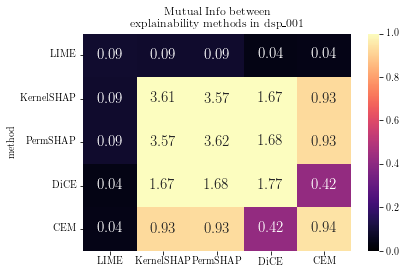

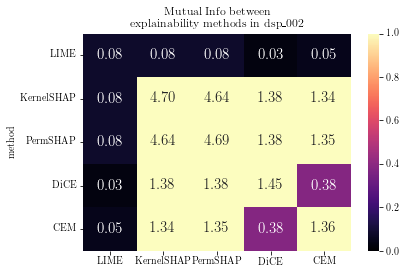

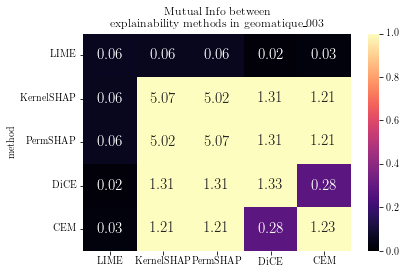

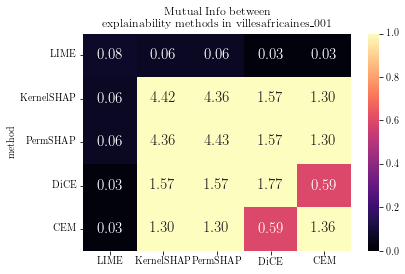

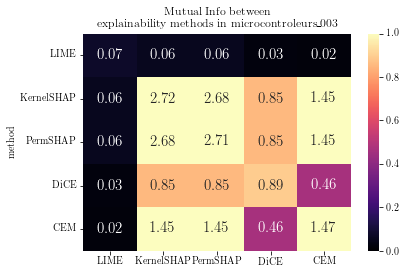

In [1736]:
dist_dict = {}
method = 'mutual_info'
pretty_name = "Mutual Info"
# course_index = 0
for course_index in np.arange(5):
    plt.figure()
    for i, course in enumerate(all_results):
        comp_mean = []
        for comparison in course:
            comp_mean.append(np.mean(comparison))
        dist_dict[i] = comp_mean
    heatmap_df = pd.DataFrame(np.array(dist_dict[course_index]).reshape(5,5), columns=['LIME', 'KernelSHAP', 'PermSHAP',  'DiCE', 'CEM'])
    heatmap_df['method'] = ['LIME', 'KernelSHAP', 'PermSHAP',  'DiCE', 'CEM']
    heatmap_df = heatmap_df.set_index('method')
    sns.heatmap(heatmap_df, cmap='magma', annot=True, vmin=0, vmax=1, fmt="0.2f", annot_kws={"fontsize":15})
    plt.title(pretty_name + ' between \nexplainability methods in '+courses[course_index])
    plt.savefig("plots/" + courses[course_index] + "_" + method + ".png", bbox_inches='tight')
    
data = json.dumps(dist_dict)
# open file for writing, "w" 
f = open(method +".json","w")
f.write(data)
f.close()

In [643]:

# def clean_col(df):
#     if 'exp number' in df.columns:
#         df = df.drop('exp number',axis=1)
#     if 'real value' in df.columns:
#         df= df.drop('real value',axis=1)
#     if 'exp_num' in df.columns:
#         df = df.drop('exp_num',axis=1)
#     return df.reset_index()


#     course_exp = course_list[course_i]
#     experiment_results = []
#     for i, methods in enumerate(exp_sets):
#         method = methods[0]
#         df = pd.DataFrame(methods[1][i][1])
#         print(df)
#         df.index = [max(i.split(' '), key=len) for i in df.columns]
#         df = df[~df.columns.duplicated()]
#         if method == 'LIME':
#             df['week'] = [int(i.split('_InWeek')[1].split(' ')[0]) for i in df.columns]
#             df['feature_name'] = [mapping(i.split('_InWeek')[0]) for i in df.columns]
#         else:
#             df['week'] = [int(i.split('_InWeek')[1]) for i in df.columns]
#             df['feature_name'] = [mapping(i.split('_InWeek')[0].split(' ')[-1]) for i in df.columns]
#             if method == 'CEM' or method == 'DiCE':
#                 df['feature_name'] = [mapping(i.split('_InWeek')[0].split(' ')[-1]) for i in df.columns]
#         for col in total_index:
#             if col not in df.columns:
#                 new_col = np.empty((len(df),1))
#                 new_col.fill(0)
#                 df.insert(0, col, new_col)
#         df = df.pivot("feature_name","week", 0)        
#         num_entries = min([len(entry) for entry in course_exp])
#         for j in np.arange(len(exp_sets)):
#             comparison_results = []
#             method_1 = clean_col(course_exp[i])
#             method_2 = clean_col(course_exp[j])
#             for k in np.arange(num_entries):
#                 distance = cosine_vector(method_1.loc[k], method_2.loc[k])
#                 comparison_results.append(distance)
#             if 'SHAP' in method:
#                 avg_result = np.mean(np.array(comparison_results), axis=0)
#             else:
#                 avg_result = np.mean(np.array(comparison_results), axis=1)
# #             print(type(avg_result))
#             experiment_results.append(avg_result)
# #             print(avg_result)
#     all_results.append(experiment_results)

{0: [0.0,
  1.0026701691145945e-17,
  9.159339953157542e-18,
  6.938893903907228e-18,
  8.465450562766818e-18,
  1.0026701691145945e-17,
  0.0,
  3.647812463778353e-17,
  9.9035432356005e-18,
  2.4495677730574172e-17,
  9.159339953157542e-18,
  3.647812463778353e-17,
  0.0,
  9.470069704073546e-18,
  2.430990335991976e-17,
  6.938893903907228e-18,
  9.903543235600502e-18,
  9.470069704073546e-18,
  0.0,
  6.161516626704553e-18,
  8.465450562766818e-18,
  2.4495677730574175e-17,
  2.430990335991975e-17,
  6.161516626704553e-18,
  0.0],
 1: [0.0,
  7.386099124325366e-18,
  7.963138118413284e-18,
  6.001205538514359e-18,
  4.577842686430825e-18,
  7.386099124325368e-18,
  0.0,
  3.7797623100960156e-17,
  1.0533838120473845e-17,
  1.677980581841402e-17,
  7.963138118413284e-18,
  3.7797623100960156e-17,
  0.0,
  1.0125901188097494e-17,
  1.6525978393824288e-17,
  6.001205538514359e-18,
  1.0533838120473847e-17,
  1.0125901188097492e-17,
  0.0,
  5.135472715360097e-18,
  4.577842686430825e-